## A Beginner Guide to Machine Learning Modeling: Tutorial with Python and Scikit-Learn **(Part3)**

In the previous post we went throughly into learning about scikit-learn models and how they don't like DataFrames that have ***missing*** data or not in ***numerical form***. In this part we will dive more into :

* picking the right scikit-learn models`
* fitting your models
* making predictions
* and evaluating your models and undertsanding metrics that go with it

Continuing with the basic capabilities and concepts of Machine Learning and **Scikit-Learn**. In this notebook we will continue to break down the steps in **Part1**  more thoroughly.  

### 2. Choosing the right estimator/algorithm for your problem

Once you've got your dat ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:

* Scikit-Learn refers to machine learning models and algorithms as estimators.
* **Classification problems**- predicting a category (ex. heart disease or not).
   * Sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's varible name.
* **Regression problem**- predicting a number (ex. selling price of a car).
* **Unsuperivised problem (data with no labels)**- clustering (grouping unlabelled samples with other simlilar unlabelled samples).

If you know what kind of problem you're working with, one of the next plces you should look at is [Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html).

This cheatsheet gives you a bit of insight into the algorith you might want to use for the problem you're working on.

It's important to remember, you dont have to explicitly know what each algorithm is doing on the inside to start using them.

If you start to apply different algorithm but they don't seem to be working (not performing as well as you'd like) that's when you'd start to look deeper into each one.

If you check the link of the [Scikitl-Learn algorithm cheatsheet](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html) You can see it's split into four main categories:

* Regression,
* classification
* clustering
* dimesionality reduction

Each has their own different purpose but the Scikit-Learn team has designed the library so the workflows for each are relatively similar.
  

## 2.1 Picking a machine learning model for a regression problem

Let's start with a regression problem (trying to predict a number). We'll use the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) built into Scikit-Learn's `datasets` module.

The goal of the California Housing dataset is to predict a given district's median house value (in hundreds of thousands of dollars) on thingslike the age of the home, the number of rooms, the number of bedrooms, number of of people living the home and more .

In [15]:
from IPython.display import Image

In [8]:
import pandas as pd
import sklearn

In [10]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing; # ges downloaded as dictionary 

Since it's in a dictionary, let's turn it into a DataFrame so we can inspect it better.

In [11]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = pd.Series(housing['target'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
# How many samples?
len(housing_df)

20640

Nice!, our goal here is to use the feature columns, such as:

* `MedIn`- median Income in block group
* `HouseAge`- median house age in block group
* `AveRoom`- average number of rooms per household
* `AveBedrms`- average number of bedrooms per houshold

To predict `target` column which expresses the median house value for specific California districts in hundreds of thousands of dollars (e.g 4.526 = $452,600).

In essence, each row is a different district in California (the data) and we're trying to buid a model to predict the median house value in that district (target/label) given a series of attributes about the houses in that district.

Since we have data and label, this is a supervised learning problem.

And since we're trying to predict a number, it's a regression problem.

Knowing these two things, how do they line up on the [Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html)

<img src="Scikit-learn-cheatsheet.png" width="700" height="300">

Following the map through, knowing what we know, it suggests we try `RidgeRegresion`. Let's check it out.

In [26]:
# Import the Ridge model class from the Linear_model module
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# Set up random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop('target', axis =1)
y = housing_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2)

# Instatiate and fit the mdel (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score() metric of regression algorithms is R^2
model.score(X_test, y_test)

0.5758549611440126

What if `RidgeRegression` didn't work? Or what if we wanted to improve our results?

<img src="Scikit-learn-cheatsheet.png" width='700' height='300'>

Following the diagram, the next step would be to try `EnsembleRegressors`. 

Ensemble is another word for multiple models put together to make a decision.

One of the most common and useful ensemble methods is the [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest). Known for its fast training and prediction times and adaptibility to differrent problems.

The basic premise of the Random Forest is to combine a number of different decision trees. each one random from the other and make a prediction on a sampple by averaging the result of each decision tree.

An in-depth discussion of the Random Forest algorithm is beyond the scope of this notebook but if you're interested in learning more, [An implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen is a great read.

Since we're working with regression, we'll use Scikit-Learn's `RandomForestRegressor`.

We can use the exact same workflow as above. Except for changing the model.


In [27]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2)

# Instatiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# CHeck the score of the model (on the test set)
# The defauly score() metric of the regression algorithm is R^2
model.score(X_test, y_test)

0.8066196804802649

Wow!

We get a good boost in score on the test set by changing the model.

This is another incredibly important concept in machine learning, if at first something doesnt achieve what you'd like, ***experiment***,***experiment***,***experiment!***

At first, the Scikit-Learn algorithm diagram can seem confusing.

But once you get a little practice applying different models to different problems, you'll start to pick up which sorts of algorithms do better with different types of data.



### 2.2. Picking a machine learning model for a classification problem

Now, let's check out the choosing process for a classification problem.

Say you were trying to predict whether or not a patient had heart disease based on their medical records.

The dataset in `../data/heart-disease.csv` contains data for just that problem

In [28]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# How many samples are there?
len(heart_disease)

303

Similar to the California Housing dataset, here we want to use all of the available data to predict the target column(1 for if a patient has heart disease and 0 if they don't).

So what do we do now?

We've got 303 samples (1 row = 1 sample) and we're trying to predict to whether or not a patient has heart disease.

Because we're trying to predict whether each sample is one thing or another, we've got a classification problem.

Let's see how it lines wit our [Scikit-Learn algorithm cheat-sheet](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html)

<img src="Scikit-learn-cheatsheet.png" width='700' height='300' >

Following the cheat-sheet we end up at `LinearSVC` which stands for Linear Support Vector Classifier. Let's try it on our data.

In [30]:
# Import LinearSVC from the svm module 
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Split the data into X (features/data) and y(target/labels)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instatiate and fit the model (on the training set )
clf = LinearSVC(max_iter=1000, # iterations on the data, 1000 is the default
                dual='auto') # dual='auto' chooses best parameters for the model automatically
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8688524590163934

Straight out the box (with no tuning or improvements) our model achieves over 85% accuracy!

Although this is a senssational result to begin with, let's check out the diagram ans see what other models we might use.

<img src="Scikit-learn-cheatsheet.png" width='700' height='300'>

Following the path (skipping a few, don't worry, we'll get to this) we come up to the `EnsembleMethods` again.

Except this time, we'll be looking at ensemble classifiers instead of regressors.

Remember our `RandomForestRegressor` from above?

Wel it has a dance partner, `RandomForestClassifier` which is an ensemble based machine learning model for classification.

You might be able to guess what we can use it for (hint: classification problems)

Let's try!

In [31]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Set up ranom seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instatiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100) # 100 is the default, but you can try 1000 and see what happend
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

It looks like the default hyperparameters of `RandomForestClassifier` don't perform as well as `LinearSVC`.

Other than trying another classification model, we could start to run experiments to try and improve these models via [hyperparameter tuning](https://scikit-learn.org/stable/modules/grid_search.html)

Hyperparameter tunining is a fancy turn for adjusting some settings on a model to try and make it better.

It usually happens once you've found a decent baseline model that you'd like to improve upon.

In this case, we could take either the `RandomForestClassifier` or the `LinearSVC` and try and improve it with hyperparameter tuning (which we'll see later on).

For example, you could try and take the `n_estimators` parameter (the number of trees in the forest) of `RandomForestClassifier` and change it from `100` (defualt) to `1000` and see what happens.

### What about the other models?

Looking at the Scikit-Learn algorithm cheat-sheet and the examples above, you may have noticed we've skipped a few models.

Why?

The first reason is time.

Covering every single one would take a fair bit longer than what we'ver done here. And the second one is the effectiveness of ensemble methods.

A little tidbit for modeling in machine learning is:

* If you have structured data (tables, spreadsheets, or dataframes), use ensemble methods, such as, a RandomForest.
* If you have unstructured data(text, images, audio, things not in tables), use deep learning or transfer learning
  (see the ZTM [TensorFlow](https://zerotomastery.io/courses/learn-tensorflow/) and [PyTorch](https://zerotomastery.io/courses/learn-pytorch/) courses for more on deep learning )

If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:

* [RandomForest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### Experiments until something works 

The beatiful thing is, the way the Scikit-Learn API is designed, once you know the way with one model, using another is much of the same

And since a big part of being a machine learning engineer or data scientist is experimenting, you might want to try out some of the other models on the cheat-sheet and see how you go. The more you can reduce the time between experiments, the better.

### 3. Fit the model to data and using it to make predictions 

Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

if you've followed through, you've seen a few examples of this already.

### 3.1 Fitting a model to data

In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the `fit()` method and passing it data, such as `fit(X,y)`.

Where `X` is a feature array and `y` is a target array.

Other names for `X` include:

* Data
* Feature variables
* Features

Other names for `y` include:

* Labels
* Target variable

For supervised learning there is usually an `X` and `y`.

For unsuperivised learning, there's no `y` (no labels).

Let's revisit the example of using patient (`X`) to predict whether or not they have heart disease (`y`).

In [32]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

# Instatiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and oass it training data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

What's happening here?

Calling the `fit()` method will cause the machine learning algorithm to attempt to find patterns between `X` and `y`. Or if there's no `y`, it'll only find patterns within `X`.

Let's see `X`.

In [33]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Passing `X` and `y` to `fit()` will cause the model to go through all of the examples in `X` (data) and see what their corresponding `y`(label) is.

How the model does this is different depending on the model you use.

Explaining the details of each would take an entire textbook.

For now, you could imagine it similar to how you would figure out patterns if you had enough time.

You'd look at the feature variables, `X`, the `age`, `sex`, `chol` (cholesterol) and see what different values led to the labels, `y`, `1` for heart disease, `0` for not heart disease.

This concept, regardless of the problem, is similar thoughout all of machine learning.

#### During training (finding patterns in data):

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict someting and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

#### During testing or in production (using learned patterns):
A machine learning algorithm uses patterns it previously learned in a dataset to make a prediction on some unseen data

### 3.2 Making Predictions using a machine learing model

Now we've got a trained model, one which hopefully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways.

Two of the most common and useful are `predict()` and `predict_proba()`.

Let's see them in action.


In [35]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Given data in the form of `X`, the `predict()` function returns labels in the form of `y`.

**Note:** For the `predict()` function to work, it must be passed `X` (data) in the sameformat the model was trained on. For example, if a model was trained on 10 features formatted in a certain way, predictions should be made on data with 10 features formatted in a certain way. Anythinhg different and it will return an error,

It's standard practice to save these predictions to variable named something like `y_preds` for later comparison to `y_test` or `y_true` (usually same as `y_test` just another name).

In [37]:
# Compare predictions to truth
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

Another way of evaluating predictions (comparing them to the truth labels) is with Scikit-Learn's [`sklearn.metrics` module](https://scikit-learn.org/stable/modules/model_evaluation.html).

Inside, you'll find methods such as `accuracy_score()`, which is the default evaluation metric for classification problems

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

`predict_proba()` returns the probablities (proba is short for probability) of a classification label.

In [59]:
# return probablities rather than labels
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

Let's see the difference

In [61]:
# Returns labels 
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict_proba()` returns an array of five arrays each containing two values.

Each number is the probability of a label given a sample.

In [62]:
# Find prediction probabilities for 1 sample
clf.predict_proba(X_test[:1])

array([[0.89, 0.11]])

This output means for the sample `X_test[:1]`, the model is predicting label 0 (index 0) with a probability score of 0.90

Because the highest probability score is at index `0` (and it's over 0.5), when using `predict()` a label of `0` is assigned.

In [63]:
# Return the label for 1 sample
clf.predict(X_test[:1])

array([0])

`predict()` can also be used for regression models.

In [65]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

# Instatiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

Now we can evaluate our regression model by using `sklearn.metrics.mean_absolute_error` which returns the average error across all samples.

In [66]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

Now we've seen how to get a model to find patterns in data using `fit()` function and make predictions using what its learned using the `predict()` and `predict_proba()` functions, it's time to evaluate those predictions.

## 4. Evaluating a Model

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Across the board, the main idea of evaluating a model is to **compare the model's predictions to what they should've ideally been** (the truth labels).

Scikit-Learn implements 3 different methods of evaluating models.

The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
The `scoring` parameter. This parameter can be passed to methods such as [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tell Scikit-Learn to use a specific type of scoring metric.
Problem-specific metric functions available in [`sklearn.metrics`](https://scikit-learn.org/stable/api/sklearn.metrics.html). Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

### 4.1 General model evaluation with `score()`

if we bring down the code from our previous classification problem, (building a classifier to predict whether or not someone has heart disease based on their  medical records).

We can see the `score()`method come into play

In [67]:
# Import the RandomForestClassifier model class from the ensemble module 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

# Instatiate the model (on the training set )
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

RandomForestClassifier()

Once the model has been fit on the training data `(X_train, y_train)`, we can call the `score()` method on it and evaluate our model on the test data, data the model has never seen before `(X_test, y_test)`.

In [69]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

Each model in Scikit-Learn implements a default metric or `score()` which is susitable for the problem.

for example:

* Classifier models usually use `metrics.accuracy_score()` as the default `score()` metric.
* Regression models generally use `metrics.r2_score()` as the default `score()` metric
* There are many more [`classification`](https://scikit-learn.org/stable/api/index.html) and [`regression`](https://scikit-learn.org/stable/api/index.html) specific metrics implemented in `sklean.metrics`.

Because `clf` is an instance of `RandomForestClassifier`, the `score()` method uses mean accuracy as its score method. 

You can find this by pressing **SHIFT + TAB** (inside a Jupyter Notebook, may be different elsewhere) within the brackets of `score()` when called on a model instance.

Behind the scenes, `score()` makes predictions on `X_test` using the trained model and then compares those preedictions to the actual labels `y_test`.

A classification model which predicts everything 100% correct would receive an accuracy score of 1.0 (or 100%).

Our model doesn't get everything correct, but at ~85% accuracy (0.85 * 100), it's still far better than guessing.

Let's do the same but with the regression code from above

In [70]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

# Instatiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Due to the consistent design of Scikit-Learn library, we can call the same `score()` method on `model`

In [73]:
# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8066196804802649

Here, `model` is an instance of `RandomForestRegressor`.

And since it's a regression model, the default metric built into `score()` is the coefficient of determination or R^2 (pronounced R-sqaured).

Remember, you can find this by pressing **SHIFT + TAB** within the brackets of score() when called on a model instance.

The best possible value here is 1.0, this means the model predicts the target regression values exactly.

Calling the `score()` method on any model instance and passing it test data is a good quick way to see how your model is going.

However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

### 4.2 Evaluating your model using the `scoring` parameter

The next step from using `score()` is to use a custom `scoring` parameter with [`cross_val_score()` ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

As you may have guessed, the `scoring` parameter you set will be different depending on the problem you're working on.

We'll see some specific examples of different parameters in a moment but first let's check out `cross_val_score()`.

To do so, we'll copy the heart disease classification code from above and then add another line at the top.

In [75]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module 
from sklearn.ensemble import RandomForestClassifier 

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

RandomForestClassifier()

Using `cross_val_score()` is slighly different to `score()`.

Let's see a code example first and then we'll go through the details.

In [76]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

In [77]:
# Using cross_val_score()
cross_val_score(clf,
                X, 
                y,
                cv=5) # cv = number of splits to test(5 by default)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

What's happening here?

The first difference you might notice is `cross_val_score()` returns an array where as `score()` only returns a single number.

`cross_val_score()` returns an array because of a parameter called cv, which stands for cross-validation.

When cv isn't set, `cross_val_score()` will return an array of 5 numbers by default (`cv=None` is the same as setting `cv=5`).

Remember, you can see the parameters of a function using **SHIFT + TAB** (inside a Jupyter Notebook) from within the brackets.

But wait, you might be thinking, what even is cross-validation?

A visual might be able to help.

<img src="cross-val-pic.png" width='700' height='300'>

We've dealt with Figure 1.0 before using `score(X_test, y_test)`.

But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset.

For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly.

The same goes for the reverse.

Figure 2.0 shows 5-fold cross-validation, a method which tries to provide a solution to:

1. Not training on all the data (always keeping training and test sets separate).
2. Avoiding getting lucky scores on single splits of the data.

Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times.

On a different split each time, returning a score for each.

Why 5-fold?

The actual name of this setup ***K-fold cross-validation***. Where ***K*** is an abitrary number. We've used 5 because it looks nice visually, and it is the default value in `sklearn.model_selection.cross_val_score`.

Figure 2.0 is what happens when we run the following.

In [79]:
# 5-fold cross-validation
cross_val_score(clf,
                X,
                y, cv=5)# cv is the equivalent to K

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

Since we set `cv=5` (5-fold cross-validation), we get back 5 different scores instead of 1.

Taking the mean of this array gives us a more in-depth idea of how our model is performing by converting the 5 scores into one.

In [81]:
np.random.seed(42)

# Single training and test split score 
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, 
                                              X, 
                                              y, cv=5))
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Notice, the average `cross_val_score()` is slightly lower than the sinlge value returned by `score()`.

In this case, if you were asked to report the accuracy of your model, even though it's lower, you'd prefer the cross-validation metric over the non-cross-validated metric.

Wait?

We haven't ised the `scoring` parameter at all.

By default, it's set to `None`.

In [82]:
cross_val_score(clf,
                X,
                y, 
                cv=5,
                scoring=None)# default scoring value, this can be set to other scoring metrics 

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

**Note:** if you notice different scores each time you call `cross_val_score()`, this is because each data split is random every time. So the model may achieve higher/lower scores on different splits of the data.
To get reproducible scores, you can set the random seed.

When `scoring` is set to `None`(by default), it uses the same metric as `score()` for whatever model is passed to `cross_val_score()`.

In this case, our model is `clf` which is an instance of `RandomForestClassifier` which uses mean accuracy as the default `score()` metric.

You can change the evaluation score `cross_val_score()` uses by changing the `scoring` parameter.

And as you might have guessed, different problems call for different evaluation scores.

The [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) outlines a vast range of evaluation metrics for different problems but let's have a look at a few

### 4.2.1 Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

1. [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
2. [Area under ROC curve (Receiver operating characteristic curve)](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
3. [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
4. [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples

In [85]:
# Import cross_val_score from model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

### Accuracy

Accuracy is the default metric for the `score()` function within each of Scikit-Learn's classifier models. And it's probably the metric you'll see most often used for classification problems.

However, we'll see in a second how it may not always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easily convert it to a percentage.

In [88]:
# Accuracy as percentage
print(f'Heart Disease Classifier Accuracy: {clf.score(X_test,y_test)* 100:.2f}%')

Heart Disease Classifier Accuracy: 85.25%


### Area Under Receiver Operating Characteristic (ROC) Curve

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short .

So if you hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of **true positive rate(tpr)** versus **false positive rate (fpr)**.

For clarity:

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Now that we knpw this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the `roc_curve` function

In [98]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities 
y_probs = clf.predict_proba(X_test)

# Keep the probabilities of the positive class only 
y_probs = y_probs[:, 1]

# Calcualte fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

Looking at these on their own doesn't make much sense. It's much easier to see their value visually. 

Let's create a helper function to make a ROC curve given false the false positve rates (`fpr`) and true positive rates (`tpr`).

**Note:** As of Scikit-Learn 1.2+, there is functionality of plotting a ROC curve. You can find this under [`sklearn.metrics.RocCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay).

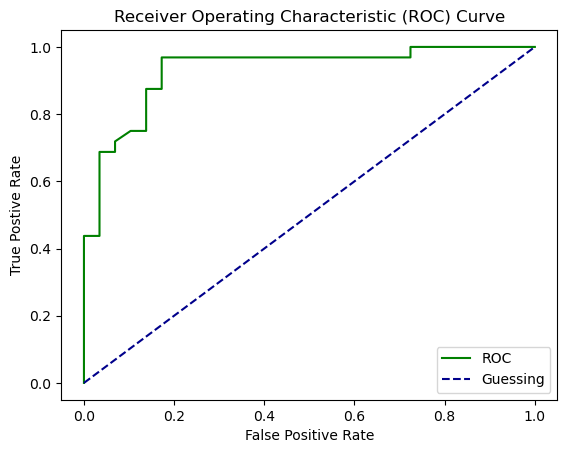

In [104]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a Roc curve given the false positve rate(fpr) and true postive rate(tpr)
    of a classifier.
     """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='green', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

Looking at the plot for the first time, it might seem a bit confusing.

The main thing to take away here is our model is doing far better than guessing.

A metric you can use to quantify the ROC curve in a single number is **AUC(Area Under Curve)**

Scikit-Learn implememts a fucntion to calculate this called [`sklearn.metrics.roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

The maximum ROC AUC score you can achieve is 1.0 and generally, the closer to 1.0, the better the model

In [105]:
from sklearn.metrics import roc_auc_score

roc_auc_score_value = roc_auc_score(y_test, y_probs)
roc_auc_score_value

0.9304956896551724

Although it was good practice, we didn;t actually need to create our own `plot_roc_curve` function.

Scikit-Learn allows us to plot a ROC curve directly from our estimator/model by using the class method `sklearn.metrics.RocCurveDisplay.from_estimator` and passing it our `estimator`, `X_test` and `y_test`. or we can plot a ROC curve directly from predictions by using the class method `sklearn.metrics.RocCurveDisplay.from_predictions` and passing it our `y_test, y_preds/y_probs`

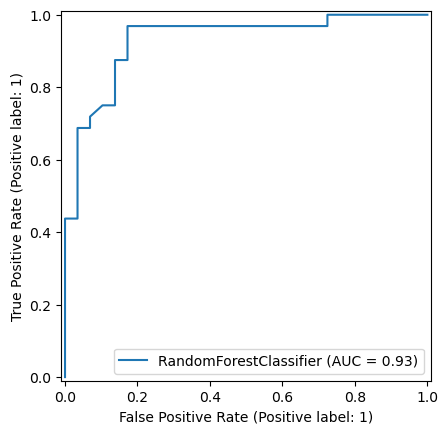

In [106]:
from sklearn.metrics import RocCurveDisplay

roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf,
                                                   X=X_test,
                                                   y=y_test)

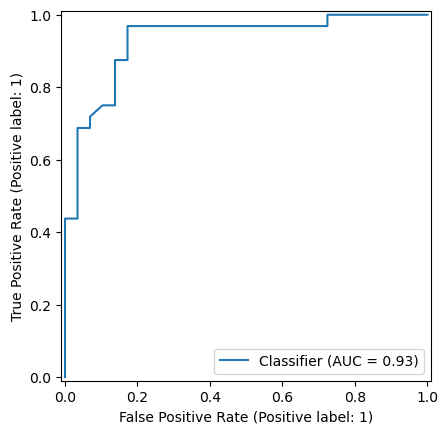

In [107]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_predictions(y_test, y_probs)

The most ideal position for a ROC curve is to run along the top left corner of the plot.

This would mean the model predicts only true positives and no false positives. And would result in a ROC  AUC score of 1.0.

You can see this by creating a ROC curve using only the `y_test` labels.

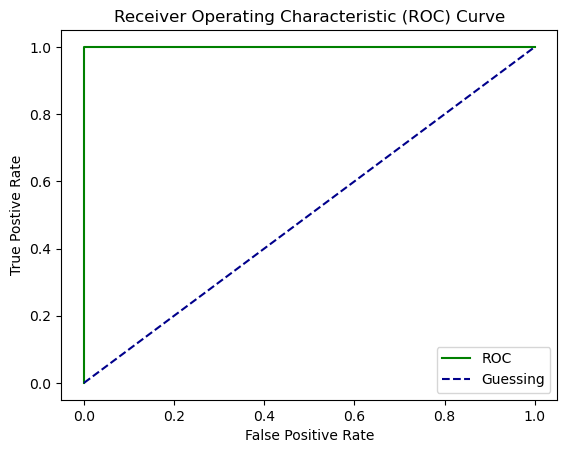

In [108]:
# Plot the perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [109]:
# Perfect ROC AUC score
roc_auc_score(y_test,y_test)

1.0

In reality, a perfect ROC curve is unlikely

### Confusion Matrix 

Another fantastic way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

A confsion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict.

In essence, giving you an idea of where the model is getting confused.

In [110]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

Again, this is probably easier visualized. 

One way to do this is with `pd.crosstab()`

In [111]:
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Label'])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


### Creating a Confusion Matrix using Scikit-Learn

Scikit-kit Learn multiple different implememtations of plotting confusion matrices:

1. [sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - this take a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on `X` and compares the predictions to `y`by displaying a confusion matrix.
2. [sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_preds)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

   **Note:** Both of these methods/classes requires Scikit-Learn 1.0+. to check your version of Scikit-Learn run:
           
         import sklearn
         sklearn.__version__
   if you don't have 1.0+, you can upgraded at:[https://scikit-learn.org/stable/install.html](https://scikit-learn.org/stable/install.html)

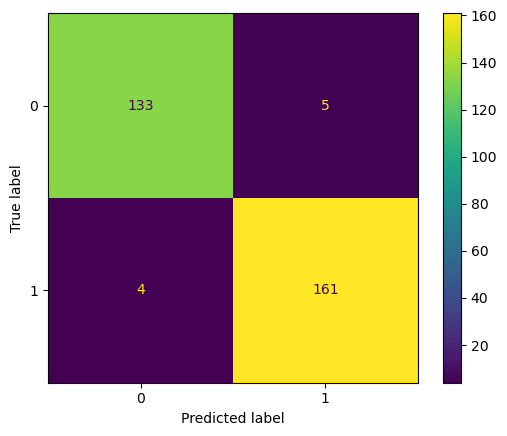

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                     X=X,
                                     y=y)

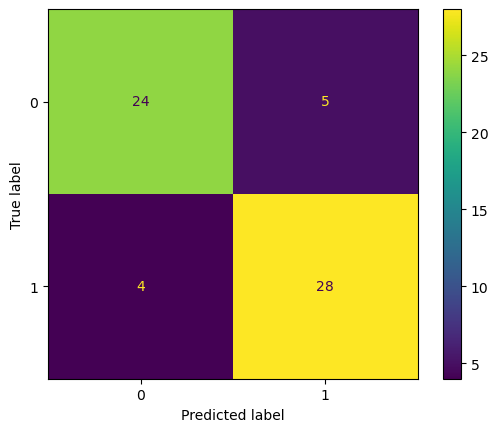

In [115]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

### Classification Report

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classificatio report using Scikit-Learn's [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) method.

Let's see one.

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test,
                            y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



it returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows with label accuracy,macro avg, and weighted avg.

Each term measures something slighly different:

* **Precision** - Indicates the proportion of positive identifications (model predicted class `1`) which were actually correct. A model which produces no false positives has a precision of 1.0
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was claculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalance (more examples pf oen class than another), you should pay attention to this.
* **Weigthed avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calcualted with respect to how many samples there are in each class.
This metric will favor the majority class(e.g it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models performance only on accuracy. And accuracy is a good metric to report, except when you have very imbalances classes.

For example, let's sat there were 10,000 people. and 1 of them had a disease. You're asked to build a model to predict who has it. 

You build the model and find your model to be 99.99% accurate. Which sounds great! ... untill you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictons are false.

In this case, you'd want to turn to metrics such as precision, recal and F1 score.

In [118]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True,
                                  zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


You can see here, we've got an accuracy  of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0

Ask yourself, although the model achieves 99.99% accuracy, is it useful?

To summarize:

* Accuracy is a good measure  to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced
* If false positive predictions are worse than false negatives, aim for higher precision
* If false negatives are worse than false positives, aim for higher recall.

  **Resource:** For more on precision and recall and the tradeoffs between them, I'd suggest going through the [Scikit-Learn Precision-Recall guide](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

### 4.2.2 Regression model evaluation metrics 

Similar to classification, there are [several metrics you can use to evaluate your regression models.](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

We'll check out the following.

1. **R^2 (pronounced r-squared) or coeffiecient of determination** - Compares your models predictions to the mean targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 values would be 1. Higher the better.
2. **Mean absolute error (MAE)** - The average of the ***absolute*** differences between predictions and actual values. It gives you an idea of how wrong your predictions were. Lower is better
3. **Mean squared error (MSE)** - The average ***squared*** differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors). Lower is better.

Let's see them in action. First, we'll bring down our regression model code again.

In [119]:
# Import the RandomForestRegressor model class from ensemble module
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Split data into feature (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

# Instatiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

**R^2 Score (coefficient of determination)**

Once you've got a trained regression model, the default evaluation metric in th `score()` function is R^2

In [121]:
# Calculate the models R^2 score 
model.score(X_test, y_test)

0.8066196804802649

Outside of the `score()` function, R^2 can be calculated using Scikit-Learn's `r2_score()` function.

A model which only predicted the mean woud get a score of 0.

In [123]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

And a perfect model would get a score of 1.

In [124]:
r2_score(y_test,y_test)

1.0

For your regression models, you'll want to maximize R^2, while minimizing MAE and MSE.

**Mean Absolute Error (MAE)**

A models mean absolute error can be calculated with Scikit-Learn's `sklearn.metrics.mean_absolute_error` method

In [125]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

Our model achieves an `MAE` of **0.326**.

This means, on average our models predictions are **0.326** units away from the actual value.

Let's make it more visual.

In [126]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predictions": y_preds})

df

,actual values,predictions
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760
...,...,...
15362,2.63300,2.220380
16623,2.66800,1.947760
18086,5.00001,4.836378
2144,0.72300,0.717820


You can see the predictions are slightly different to the actual values.

Depending what problems you're working on , having  a difference like we do now, might be okay. On the flip side, it may also not be okay, meaning the predictions would have to be closer.

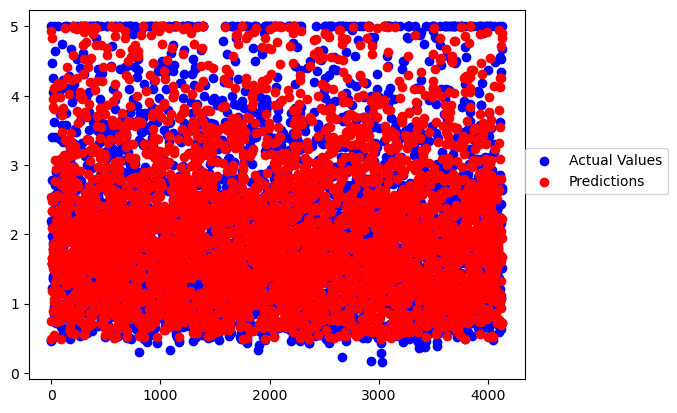

In [127]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x,df["actual values"], c='b', label="Actual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1,0.5))

**Mean Squared Error (MSE)**

How about MSE?

We can calculate it with Scikit-Learn's `sklearn.metrics.mean_squared_error`.

In [129]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

`MSE` will often be higher than `MAE` because it squares the errors rather than only taking the absolute difference into account

Now you might be thinking, which regression evalutation metric should you use?

* `R^2` is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* `MAE` gives a better indication of how far off each of your model's predictions are on average.
* As for `MAE` or `MSE`, because of the way `MSE` is calcualted, squaring the differneces between predicted values and actual values, it amplified larger differences. Let's say we're predicting the values of houses (which we are).
  
    * Pay more attention to MAE: when being 10,000(USD) off is ***twice*** as bad as being 5,000 off.
    * Pay more attention to MSE: when being 10,000(USD) off is ***more than twice*** as bas being 5,000 off
      
      **Note:** What we've covered here is only a handful of potential metrics you can use to evaluate your models. If you're after a complete list, check out the [Scikit-Learn metrics and scoring documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)

### 4.2.3 Evaluating a model using the `scoring` parameter

We've covered a bunch of ways to evaluate model's predictions but we haven't even touched the `scoring` parameter...

Not to worry, it's very similar to what we've been doing

As a refresh, the`scoring` parameter can be used with a function like `cross_val_score()` to tell Scikit-Learn what evaluation metric to return using cross-validation.

Let's check it out with our classification model and the heart disease dataset

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

First, we'll use the default, which is mean accuracy.

In [131]:
np.random.seed(42)
cv_acc = cross_val_score(clf,
                         X,
                         y, 
                         cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

We've seen this before, now we got 5 different accuracy scores on different test splits of the data.

Averaging this gives the cross-validates accuracy.

In [133]:
# Cross-validated
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


We can find the same using the `scoring` parameter and passing it `"accuracy"`.

In [135]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


The same goes for the other metrics we've been using for classification 

Let's try `"precision"`

In [141]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is:{np.mean(cv_precision):.2f}")

The cross-validated precision is:0.83


How about `"recall"`?


In [140]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


And `"f1"` (for F1 score)?

In [142]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is:{np.mean(cv_f1):.2f}")

The cross-validated F1 score is:0.84


We can repeat this process with our regression metrics. 

Le's revisit our regression model.

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

The default `"r2"`

In [147]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.65


But we can use `"neg_mean_absolute_error"` for MAE(mean absolute error).

In [148]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE is: {np.mean(cv_mae):.2f}")

The cross-validated MAE is: -0.47


Why the `"neg_"`?

Because Scikit-Learn documentation states:

   ["All scorer objects follow the convention that higher return values are better than lower return values."](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

Which in this case, means a lower negative value (closer to 0) is better.

What about `"neg_mean_squared_error"` for MSE(mean squared error)?

In [149]:
np.random.seed(42)
cv_mse = cross_val_score(model,
                        X,
                        y,
                        cv=5,
                         scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -0.43


### 4.3 Using different evaluation metrics with Scikit-Learn

Remember the third way of evalutating Scikit-Learn functions?

   3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed differenr scoring functions, Scikit-Learn implements these as stand alone functions.

Well, we've kind of covered this third way of using evaluation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called `y_preds` to an array of actual labels, usually called `y_test` or `y_true`.

**Classification Functions**

For:

 * Accuracy we can use `sklearn.metrics.accuracy_score`
 * Precision we can use `sklearn.metrics.precision_score`
 * Recall we can use `sklearn.metrics.recall_score`
 * F1 we can use `sklearn.metrics.f1_score`

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on test set
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


**Regression Metrics**

We use a similar setup for our regression problem, just with different methods.

For:

 * R^2 we can use `sklearn.metrics.r2_score`
 * MAE(mean absolute error) we can use `sklearn.metrics.mean_absolute_error`
 * MSE(mean squared error) we can use `sklearn.metrics.mean_square_error`

In [153]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1)
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

#  Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test,y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test,y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25


Nice! 

We've covered a lot!

But it's worth it.

Because evaluating a model's predictions is as important as training a model in any machine learning project.

There's nothing worse than training a machine learning model and optimizing for the wrong evaluation metric.

Keep the metrics and evaluation methods we've gone through when training your fututre models.

If you're after extra reading, I'd go through the [Scikit-Learn guide for model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)

We've come to the end of this Part 3 tutorial on Machine Learning with Scikit-Learn and Python. If you got to the end of this than kudos to you (this was a rather long notebook) but regardless im proud of your progress and hope you keep at it!. 

the next and final Part if this installment will be cover:

* Hyperparameter tuning to improve our metrics
* Machine Learnng Pipelines

Special Thanks to Daniel Bourke and Andrei for their guidance and help through my Data Science, Machine Learning Journey.

Thank you guys for reading and ill see you in Part 4. 